In [1]:
%load_ext autoreload
%autoreload 2

# PatchVisualizer : Tools for attention visualize in MOFTransformer

An interpretation of feature importance can afford a better understanding of the relationship between structures and properties. \
Given that the attention scores measure how much it should pay attention to the inputs when predicting the desired properties, 
the attention layers of the Transformer allow assigning high attention scores to the input features according to their importance. \
As such, we analyzed the feature importance of the properties via the attention scores of the fine-tuning models

You can import and use the PatchVisualizer in the visualize of MOFTransformer.

In [2]:
from visualize import PatchVisualizer

# 1. Generate \<PatchVisualize\>

PatchVisualizer can be generated from 'model path' and 'data path'

- `model path` : path of model from fine-tuned MOFTransformer with format '.ckpt'
- `data_root` : path of dataset directory obtained from 'prepared_data.py. (see Dataset Preparation)\
    MOFs to be visualized must exist in `{dataset_folder}/test.json` or `{dataset_folder}/test_{downstream}.json`,\
     and `{dataset_folder}/test folder`.
    *.graphdata, *.grid, *.griddata16 files should be existed in {dataset_folder}/test folder.
- `downstream` : (optional) Use if data are existed in `{dataset_folder}/test_{downstream}.json` (default:'')
- `cif_root` : (optional) path of directory including cif file. The cif lists in the dataset folder should be included.\
    If not specified, it is automatically specified as a {dataset_folder}/test folder.
 

PatchVisualizer` Class can be generated through the following two functions.
### 1) PatchVisualizer.from_cifname
Create PatchVisualizer from cif name. cif must be in test.json or test_{downstream}.json.
- `cifname` : (str) name or path of cif. Data matching the corresponding cif name is retrieved from the dataset.
- `model_path` : (str) path of model (more deatils are in above)
- `data_root` : (str) root of dataset (more deatils are in above)
- `downstream` : (optional, str) use if cifs existed in test_{downstream}.json.
- `cif_root` : (optional, str) root of cifs. default : `data_root/test`

Parameters written below are optional
- figsize : (float, float) figure size in matplotlib
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)
- num_patches : (int, int, int) number of patches in unitcell (default : (6, 6, 6))
- max_length : (float) maximum value for primitive lattice length of structure file (Å)
- min_length: (float) minimum value for primitive lattice length of structure file (Å)

In [4]:
from visualize import PatchVisualizer

model_path = './examples/visualize/model/bandgap.ckpt'
data_path = './examples/visualize/dataset/'

cifname = 'MIBQAR01_FSR'

vis = PatchVisualizer.from_cifname(cifname, model_path, data_path)
print (vis)

Global seed set to 0


load model : ./examples/visualize/model/bandgap.ckpt
read ./examples/visualize/dataset/test.json...
MIBQAR01_FSR
class <PatchVisualizer> from MIBQAR01_FSR


### 2) PatchVisualizer.from_index
Create PatchVisualizer from index. The index corresponds 1:1 to the MOF in the json file in dataset folder. The index matches the cif order of json.
- `index` : (int) index of dataset.
- `model_path` : (str) path of model (more deatils are in above)
- `data_root` : (str) root of dataset (more deatils are in above)
- `downstream` : (optional, str) use if cifs existed in test_{downstream}.json.
- `cif_root` : (optional) root of cifs. default : `data_root/test`

Parameters written below are optional
- figsize : (float, float) figure size in matplotlib
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)
- num_patches : (int, int, int) number of patches in unitcell (default : (6, 6, 6))
- max_length : (float) maximum value for primitive lattice length of structure file (Å)
- min_length: (float) minimum value for primitive lattice length of structure file (Å)

In [5]:
from visualize import PatchVisualizer

model_path = './examples/visualize/model/h2_uptake.ckpt'
data_path = './examples/visualize/dataset/'

batch_id = 0

vis = PatchVisualizer.from_index(0, model_path, data_path)
print (vis)

Global seed set to 0


load model : ./examples/visualize/model/h2_uptake.ckpt
read ./examples/visualize/dataset/test.json...
class <PatchVisualizer> from MIBQAR01_FSR


# 2. Visualize Graph Attention

Graph attention can be schematized from the patch visualizer. It can be generated simply using the `draw_graph` function.\
If you use `%matplotlib widget` or `%matplotlib tk` in jupter notebook/lab, you can turn around or zoom in/out the figure.\
The attention score can be checked through the edge color of each atom.

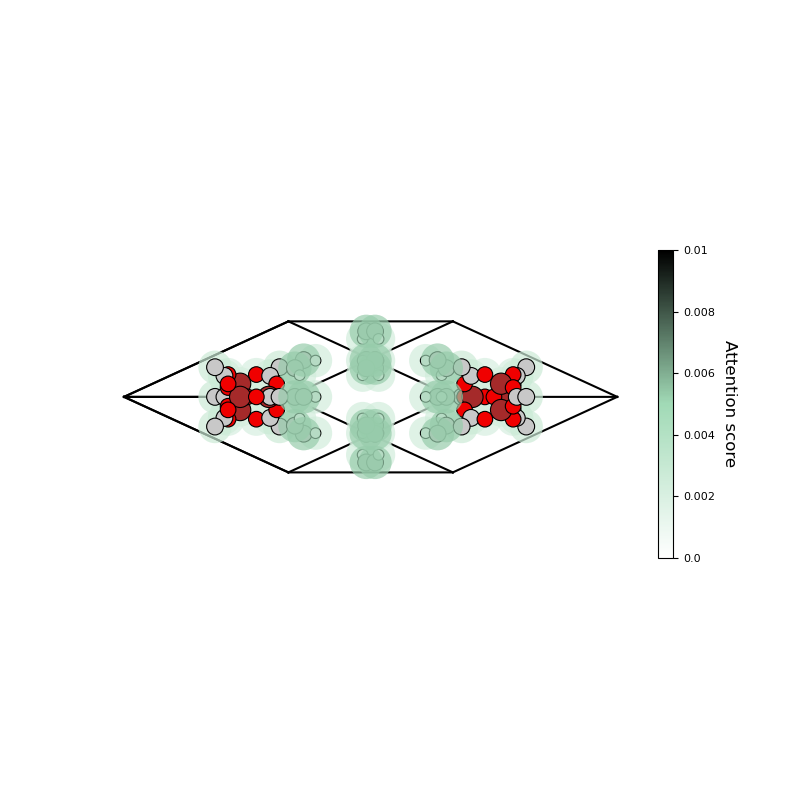

In [6]:
%matplotlib widget
vis.draw_graph()

Figure can be drawn by adjusting various parameters. all parameters are optinal.
- `minatt` : (float) Minimum value of attention score (default : 0.000). A value smaller than minatt is treated as minatt.
- `maxatt` : (float) Maximum value of attention score (default : 0.010). A value larger than maxatt is treated as maxatt.
- `alpha` : (float) The alpha blending value, between 0 (transparent) and 1 (opaque).
- `atomic scale_factor` : (float) The factors that determines atom size. (default = 1)
- `grid_scale_factor` : (float) The factors that determines grid size (default = 3)
- `att_scale_factor` : (float) The factor that determines attention-score overlay size (default = 5)

The keywords below apply only to this figure. (If you want to change the global attribute, see section 4)
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)

If you want to change the `color bar`, refer to section 4

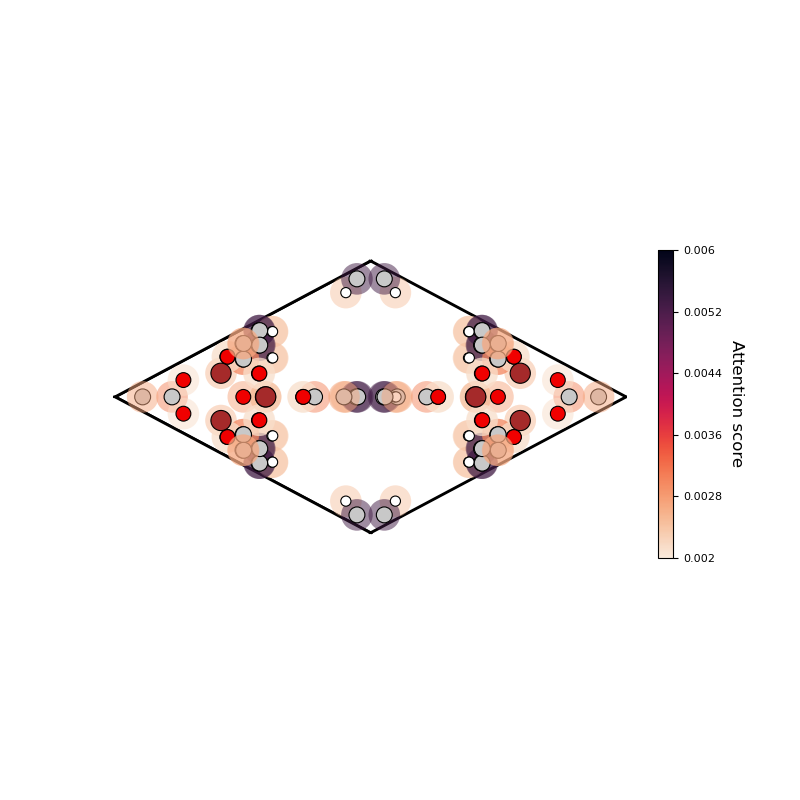

In [7]:
%matplotlib widget
minatt, maxatt = 0.002, 0.006
view_init=(0, -55)
cmap = 'rocket_r'
alpha = 0.5
grid_scale_factor = 1.8
atomic_scale_factor = 1.5
att_scale_factor= 3
vis.draw_graph(minatt=minatt, maxatt=maxatt, view_init=view_init, alpha=alpha, cmap=cmap,
               grid_scale_factor=grid_scale_factor, 
               atomic_scale_factor=atomic_scale_factor,
               att_scale_factor=att_scale_factor)

# 3. Visualize Grid Attention

Grid attention can be schematized from the patch visualizer. It can be generated simply using the `draw_grid` function.\
If you use `%matplotlib widget` or `%matplotlib tk` in jupter notebook/lab, you can turn around or zoom in/out the figure.
The attention score can be checked through the color of each patch.

## 1) draw_grid

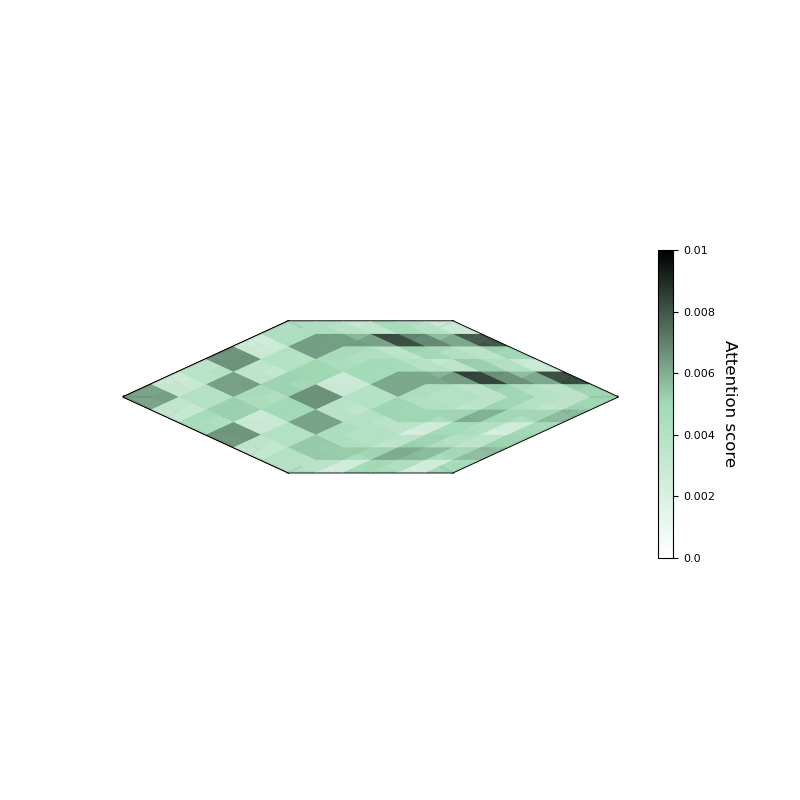

In [8]:
vis.draw_grid()

Figure can be drawn by adjusting various parameters. all parameters are optinal.
- `minatt` : (float) Minimum value of attention score (default : 0.000). A value smaller than minatt is treated as minatt.
- `maxatt` : (float) Maximum value of attention score (default : 0.010). A value larger than maxatt is treated as maxatt.
- `patch_list` : (list) list of patch position that plot in figure. Draw all patches if not specified.
- `remove_under_minatt` : (bool) If True, do not draw a patch with an attention value lower than `minatt`.
- `alpha` : (float) The alpha blending value, between 0 (transparent) and 1 (opaque).
- `atomic scale_factor` : (float) The factors that determines atom size. (default = 1)
- `grid_scale_factor` : (float) The factors that determines grid size (default = 3)

The keywords below apply only to this figure. (If you want to change the global attribute, see section 4)
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)

If you want to change the `color bar`, refer to section 4

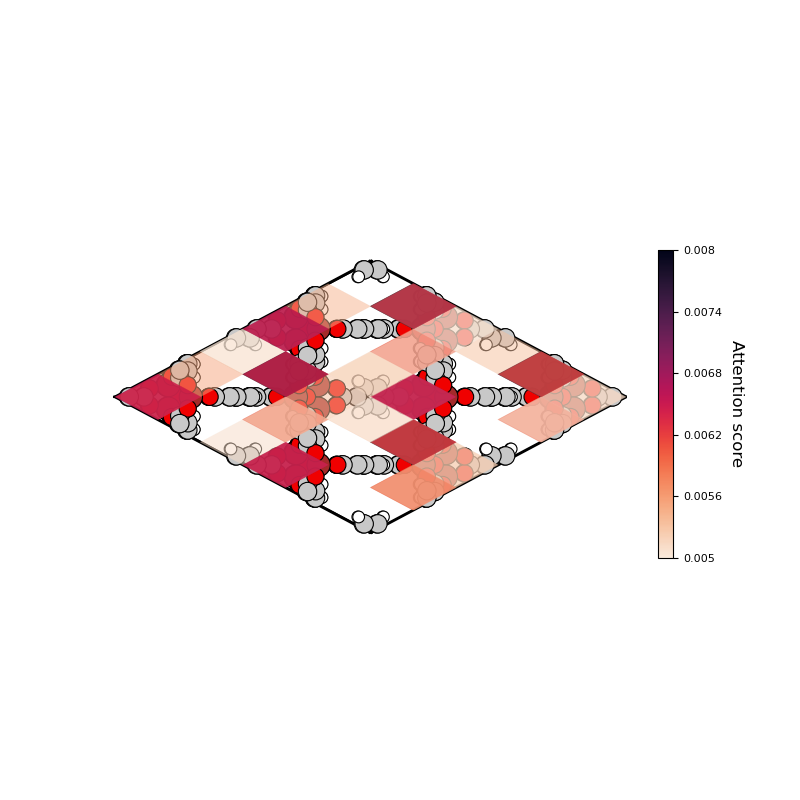

In [9]:
%matplotlib widget
minatt, maxatt = 0.005, 0.008
view_init=(0, -55)
cmap = 'rocket_r'
alpha = 0.3
grid_scale_factor = 1.8
atomic_scale_factor = 2

vis.draw_grid(minatt=minatt, maxatt=maxatt, view_init=view_init, alpha=alpha, cmap=cmap,
              grid_scale_factor=grid_scale_factor, 
              atomic_scale_factor=atomic_scale_factor, 
              remove_under_minatt=True)

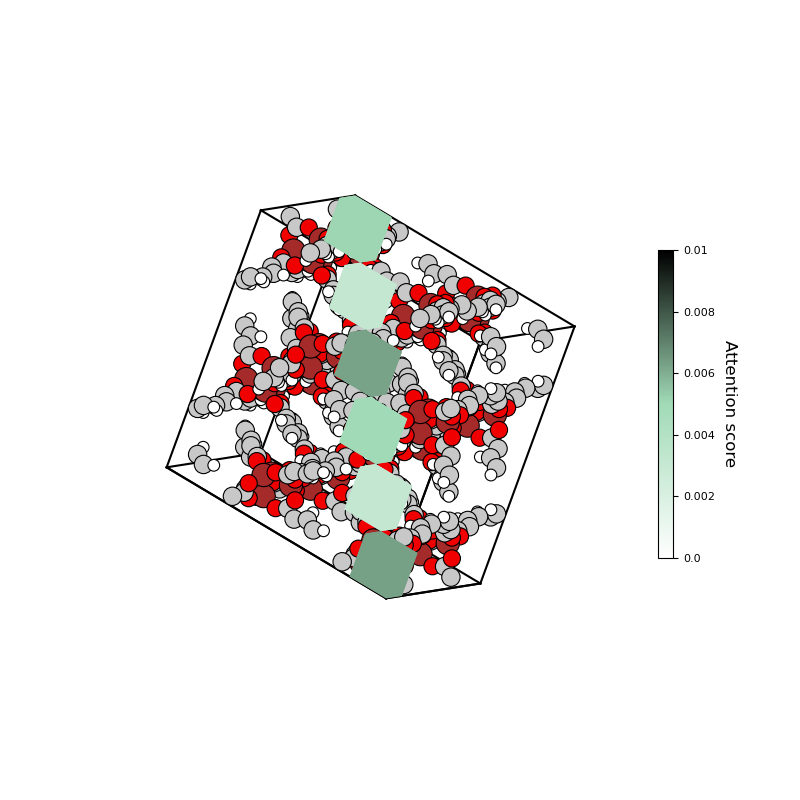

In [10]:
%matplotlib widget
view_init=(27, -92)
alpha = 1
grid_scale_factor = 1.8
atomic_scale_factor = 2
patch_list = [[0,0,0], [1,1,1], [2,2,2], [3,3,3], [4,4,4], [5,5,5]] # make list to patch position
vis.draw_grid(view_init=view_init, alpha=alpha,
              grid_scale_factor=grid_scale_factor, 
              patch_list=patch_list,
              atomic_scale_factor=atomic_scale_factor)

## 2) draw_grid_with_attention_rank

Rank means that the attention score is listed in the order of high.
- `rank` : (int or iterable) The rank (int) or iterable of ranks (list, np.array, tuple, range, etc) of the patch you want to draw.

Figure can be drawn by adjusting various parameters. all parameters are optinal.
- `minatt` : (float) Minimum value of attention score (default : 0.000). A value smaller than minatt is treated as minatt.
- `maxatt` : (float) Maximum value of attention score (default : 0.010). A value larger than maxatt is treated as maxatt.
- `remove_under_minatt` : (bool) If True, do not draw a patch with an attention value lower than `minatt`.
- `alpha` : (float) The alpha blending value, between 0 (transparent) and 1 (opaque).
- `atomic scale_factor` : (float) The factors that determines atom size. (default = 1)
- `grid_scale_factor` : (float) The factors that determines grid size (default = 3)

The keywords below apply only to this figure. (If you want to change the global attribute, see section 4)
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)

If you want to change the `color bar`, refer to section 4

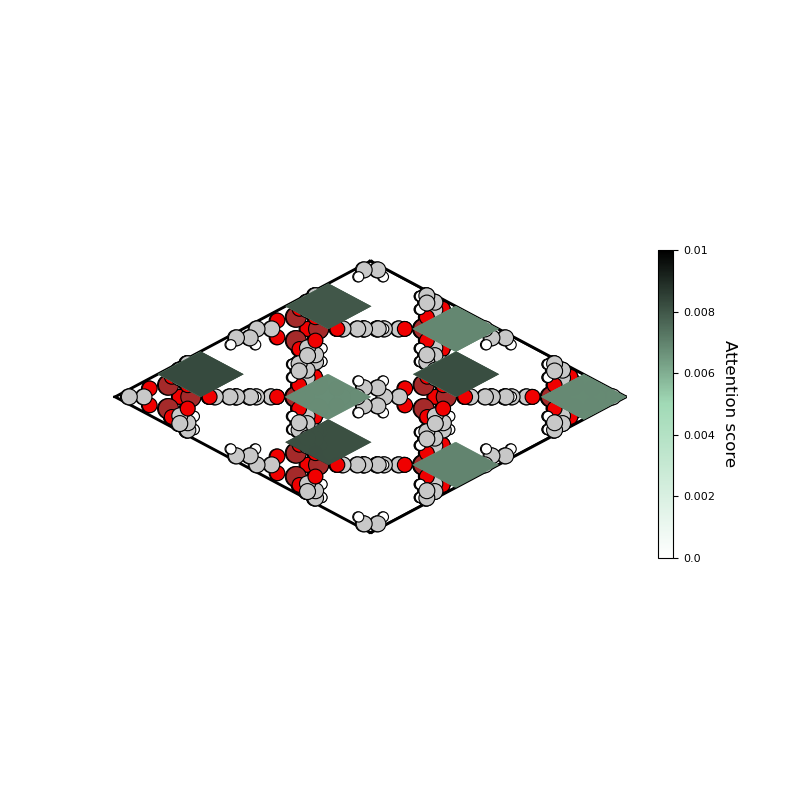

In [11]:
view_init = (0, 125)
grid_scale_factor=1.8
atomic_scale_factor=1.5
rank = range(20)

vis.draw_grid_with_attention_rank(rank, view_init=view_init, 
                                  grid_scale_factor=grid_scale_factor,
                                  atomic_scale_factor=atomic_scale_factor)

## 3) draw_specific_patch

Draw one specific patch with neighbor atoms.
- `patch_position` : (list) patch position that plot in figure.

Figure can be drawn by adjusting various parameters. all parameters are optinal.
- `ep` : (float) Distance of patches to be visualized around target patches (default = 0.5)
- `color` : (bool) If True, paint patch's color that indicate attention grid
- `minatt` : (float) Minimum value of attention score (default : 0.000). A value smaller than minatt is treated as minatt.
- `maxatt` : (float) Maximum value of attention score (default : 0.010). A value larger than maxatt is treated as maxatt.
- `alpha` : (float) The alpha blending value, between 0 (transparent) and 1 (opaque).
- `atomic scale_factor` : (float) The factors that determines atom size. (default = 1)
- `grid_scale_factor` : (float) The factors that determines grid size (default = 3)

The keywords below apply only to this figure. (If you want to change the global attribute, see section 4)
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)

If you want to change the `color bar`, refer to section 4

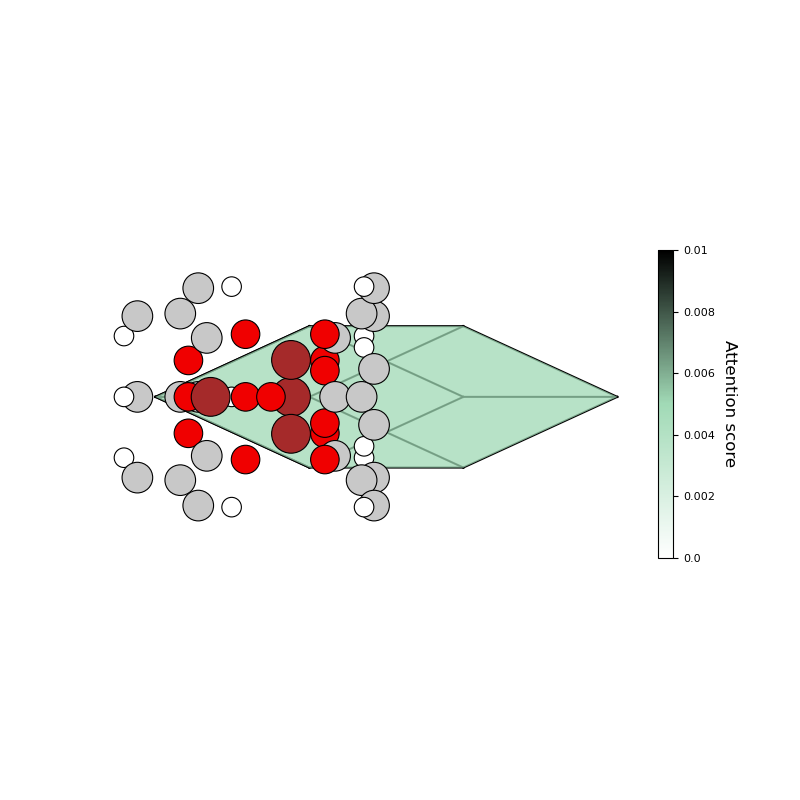

In [12]:
%matplotlib widget
patch_position = [2, 2, 2]
view_init = (0, -55)
vis.draw_specific_patch(patch_position, alpha=0.5, view_init=0)

## 4) draw_specific_patch

Rank means that the attention score is listed in the order of high.
- `rank` : (int or iterable) The rank (int) of the patch you want to draw.

Figure can be drawn by adjusting various parameters. all parameters are optinal.
- `ep` : (float) Distance of patches to be visualized around target patches (default = 0.5)
- `color` : (bool) If True, paint patch's color that indicate attention grid
- `minatt` : (float) Minimum value of attention score (default : 0.000). A value smaller than minatt is treated as minatt.
- `maxatt` : (float) Maximum value of attention score (default : 0.010). A value larger than maxatt is treated as maxatt.
- `alpha` : (float) The alpha blending value, between 0 (transparent) and 1 (opaque).
- `atomic scale_factor` : (float) The factors that determines atom size. (default = 1)
- `grid_scale_factor` : (float) The factors that determines grid size (default = 3)

The keywords below apply only to this figure. (If you want to change the global attribute, see section 4)
- view_init : (float, float) view init from matplotlib (elevation, azimuth)
- show_axis : (bool) If True, axis are visible. (default : False)
- show_colorbar : (bool) If True, colorbar are visible. (default : False)
- cmap : (str or matplotlib.colors.ListedColormap) color map used in figure. (default : None)

If you want to change the `color bar`, refer to section 4

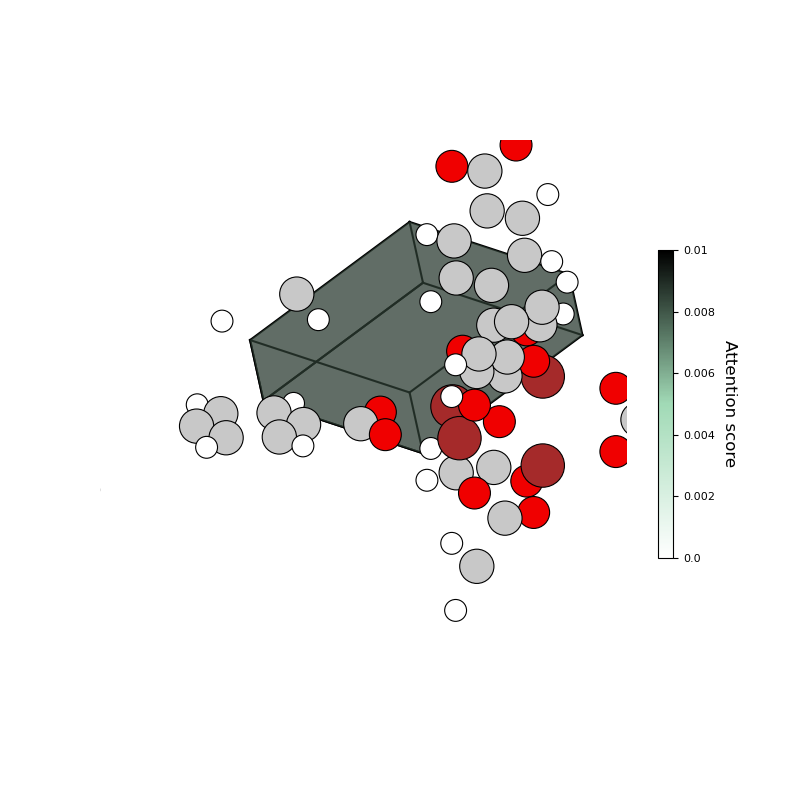

In [13]:
view_init = (15, -58)
vis.draw_specific_patch_with_attention_rank(1, alpha=0.5, ep=0.8, 
                                            view_init = view_init,
                                           grid_scale_factor=2)

# 4. Parameters

## 1) Parameters for figure

These parameters may be changed through the variable assignment.
- figsize, view_init, show_axis, show_colorbar, cmap
- PatchVisualizer.set_default() to change all parmeters to default

In [14]:
print (f'Before | figsize:{vis.figsize}, view_init:{vis.view_init}, show_axis:{vis.show_axis}, show_colorbar:{vis.show_colorbar}, vis.cmap:{vis.cmap}')

vis.figsize = (4, 4)
vis.view_init = (30, 30)
vis.show_colorbar = False
vis.show_axis = True
vis.cmap = 'viridis'

print (f'After  | figsize:{vis.figsize}, view_init:{vis.view_init}, show_axis:{vis.show_axis}, show_colorbar:{vis.show_colorbar}, vis.cmap:{vis.cmap}')

vis.set_default()

print (f'Clear  | figsize:{vis.figsize}, view_init:{vis.view_init}, show_axis:{vis.show_axis}, show_colorbar:{vis.show_colorbar}, vis.cmap:{vis.cmap}')

Before | figsize:(8, 8), view_init:(0, 0), show_axis:False, show_colorbar:True, vis.cmap:None
After  | figsize:(4, 4), view_init:(30, 30), show_axis:False, show_colorbar:False, vis.cmap:viridis
Clear  | figsize:(8, 8), view_init:(0, 0), show_axis:False, show_colorbar:True, vis.cmap:None


## 2) parameters for colorbar

Default colorbar options are in `cbar_kwargs` 

In [15]:
print (vis.cbar_kwargs)

{'num_ticks': 6, 'decimals': 4, 'labelpad': 16, 'labelsize': 12.0, 'fontsize': 8, 'fraction': 0.1, 'shrink': 0.5}


you can change colorbar options using `set_colorbar_options`

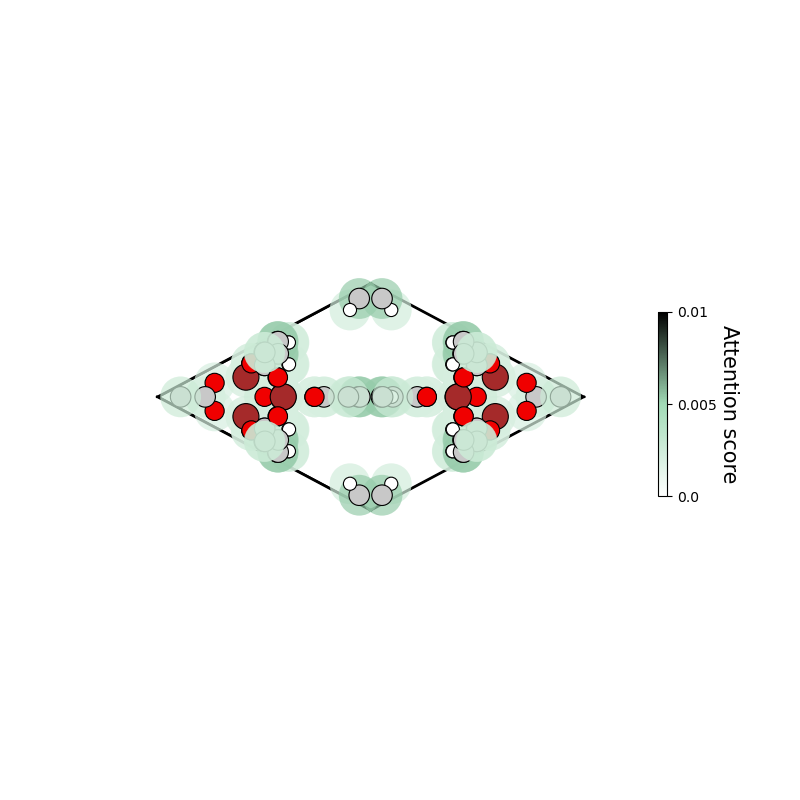

In [16]:
vis.set_colorbar_options(num_ticks=3, fontsize=10, labelsize=15, shrink=0.3)
vis.draw_graph(grid_scale_factor=1.5, view_init=(0, -55))

In [17]:
# to default colorbar
vis.set_colorbar_options(default=True)

## 3) attention value

- `heatmap_graph` : attention value for graph
- `heatmap_grid` : attention value for grid

In [18]:
# heatmap_graph
vis.heatmap_graph[:30]

array([0.00240673, 0.00531519, 0.00213253, 0.00269731, 0.0030126 ,
       0.00250176, 0.00270852, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
# heatmap_grid
vis.heatmap_grid[:3, :3, :3]

array([[[0.00630081, 0.00647857, 0.00422034],
        [0.00313501, 0.00272736, 0.00228546],
        [0.00474342, 0.00195758, 0.00476404]],

       [[0.00279237, 0.00347699, 0.00552202],
        [0.00400896, 0.00320097, 0.00371595],
        [0.00523569, 0.00491094, 0.00606902]],

       [[0.00381168, 0.00466787, 0.00300469],
        [0.00637502, 0.00652095, 0.00824197],
        [0.00443801, 0.00320968, 0.00497264]]])